In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#import dataset and replace ? values with na
full_arr_df = pd.read_csv('arrhythmia.data', na_values='?')

In [3]:
# Create arr_df dataframe with selected interesting columns (data looked cleaner)
arr_df = full_arr_df.iloc[:, [0,1,2,3,4,5,6,7,8,14]]
# Labeled columns
arr_df.columns = ['Age', 'Sex', 'Height', 'Weight', 'QRS duration', 'P-R interval', 'Q-T interval', 'T interval', 'P interval', 'Heart Rate']

In [4]:
#Display 50 rows for reference
arr_df.head(50)

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,Heart Rate
0,56,1,165,64,81,174,401,149,39,53.0
1,54,0,172,95,138,163,386,185,102,75.0
2,55,0,175,94,100,202,380,179,143,71.0
3,75,0,190,80,88,181,360,177,103,NaN
4,13,0,169,51,100,167,321,174,91,84.0
5,40,1,160,52,77,129,377,133,77,70.0
6,49,1,162,54,78,0,376,157,70,67.0
7,44,0,168,56,84,118,354,160,63,64.0
8,50,1,167,67,89,130,383,156,73,63.0
9,62,0,170,72,102,135,401,156,83,70.0


In [5]:
#Display some summary stats for each column
arr_df.describe()

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,Heart Rate
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,450.000000
mean,46.407982,0.552106,166.135255,68.144124,88.915743,155.068736,367.199557,169.940133,89.935698,74.488889
std,16.429846,0.497830,37.194646,16.599841,15.381143,44.856534,33.422017,35.672130,25.813912,13.875556
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,44.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,65.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,72.000000
75%,58.000000,1.000000,170.000000,78.500000,94.000000,174.500000,384.000000,179.000000,102.000000,81.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,163.000000


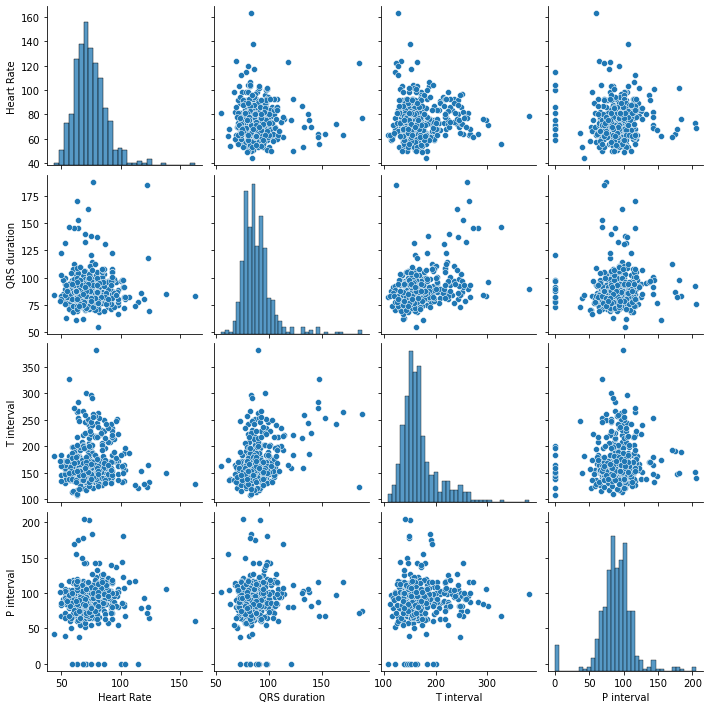

In [6]:
#Tried to find a comparison with obvious clusters
sns.pairplot(arr_df[['Heart Rate', 'QRS duration', 'T interval', 'P interval']])


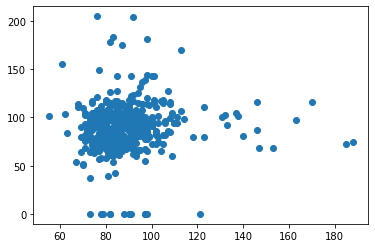

In [7]:
#I thought QRS duration vs P interval looked interesting
plt.scatter(x=arr_df['QRS duration'], y=arr_df['P interval'])
plt.show()

In [8]:
k_df = arr_df.loc[:, ('QRS duration','P interval')]
k_df

,QRS duration,P interval
0,81,39
1,138,102
2,100,143
3,88,103
4,100,91
...,...,...
446,80,117
447,100,73
448,108,116
449,93,63


Text(0, 0.5, 'SSE')

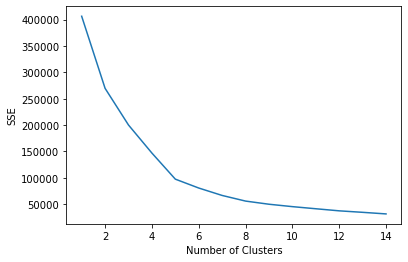

In [9]:
#Using elbow method. From this plot, I chose 5 for the number of clusters
%matplotlib inline
from sklearn import cluster
numClusters = range(1,15)
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(k_df)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [10]:
#Calculates the sum of least squared errors for 1-14 clusters
mycenters = pd.DataFrame({'Clusters' : range(1,15), 'SSE' : SSE})
mycenters

,Clusters,SSE
0,1,406321.933481
1,2,269690.502439
2,3,200200.919400
3,4,147036.683288
4,5,97601.135155
5,6,80772.506015
6,7,66700.984480
7,8,56030.174696
8,9,50051.844635
9,10,45499.110016


In [11]:
k_means = cluster.KMeans(n_clusters=5, max_iter=50, random_state=1)
k_means.fit(k_df) 
labels = k_means.labels_
k_means.cluster_centers_

array([[ 85.46268657,  76.87064677],
       [ 87.56435644, 102.75742574],
       [ 87.85714286,   5.42857143],
       [ 90.11764706, 160.23529412],
       [145.47058824,  91.35294118]])

In [12]:
k_df['Clusters'] = labels
k_df.head(20)

,QRS duration,P interval,Clusters
0,81,39,2
1,138,102,4
2,100,143,3
3,88,103,1
4,100,91,1
5,77,77,0
6,78,70,0
7,84,63,0
8,89,73,0
9,102,83,0


Text(0, 0.5, 'P interval')

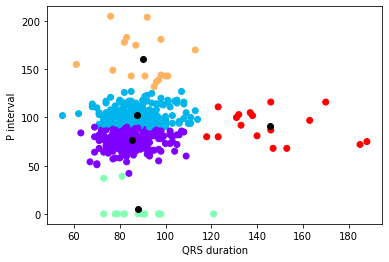

In [13]:
#Here's the final plot, using n=5 clusters 
plt.scatter(k_df['QRS duration'], k_df['P interval'], c=k_means.labels_,cmap='rainbow')
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], color='black')
plt.xlabel('QRS duration')
plt.ylabel('P interval')

<AxesSubplot:xlabel='QRS duration', ylabel='P interval'>

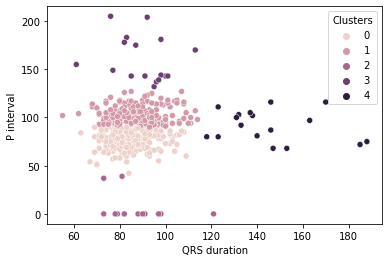

In [14]:
#just wanted to see what this looked like in seaborn
sns.scatterplot(x="QRS duration", y="P interval",hue = 'Clusters',  data=k_df)
